# Homework 3: Regression and regularization (50 points)


Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 3 is due on Thursday, 1/26 at 9:00am. Late work will not be accepted.  

In [229]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. LASSO and Ridge Regression on simulated data (25 points)

Below we create a simulated dataset that is very similar to what we used in the lecture demos. The dataset has two variables called `X` and `Y`.

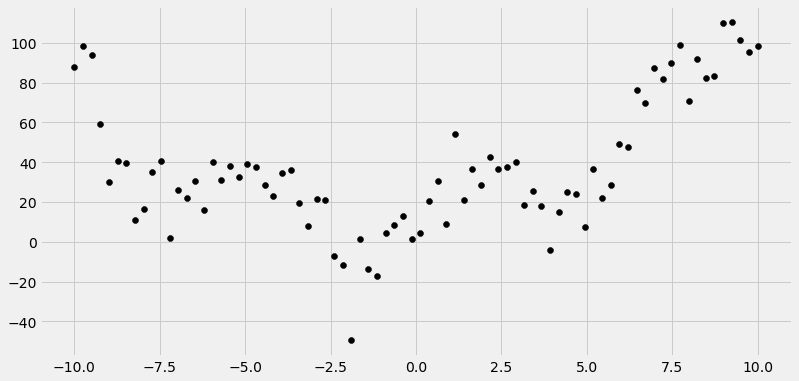

In [230]:
# run this
# the simulated dataset (similar to the lecture 6 demos)
np.random.seed(73)
n = 80
sigma = 12
X = np.linspace(-10, 10, n)
X = np.sort(X)
Y = 2 * X + 10 +  20*np.sin(X) + 0.8*(X)**2 + sigma * np.random.randn(n)

X=X.reshape(n,1)
Y=Y.reshape(n,1)

plots.figure(figsize=(12, 6))  
plots.scatter(X,Y,color="black");

### Question 1 (5 points)

The goal here is to create the set of 20 polynomial features that contains the first 20 powers of the existing feature X:

$$ \large
F_{20}(X) = \left[X, X^2, \ldots, X^{20} \right]
$$

Using functions we introduced in class, like `PolynomialFeatures` and `StandardScaler`, create a **data frame** called `X20_df` that  contains the 20 features that are standardized.

In [231]:
## Answer here and in additional cells if needed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

poly20 = PolynomialFeatures(degree=20, include_bias = False)
X20_df = pd.DataFrame(columns = range(20))
X_poly20 = scaler.fit_transform(poly20.fit_transform(X))
X20_df.head()
for i in range(80):
    X20_df.loc[i] = X_poly20[i]
X20_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.710534,2.153756,-2.549165,2.819680,-3.118918,3.308251,-3.556254,3.694706,-3.909703,4.012119,-4.203687,4.278804,-4.452735,4.506279,-4.666404,4.702408,-4.851421,4.872869,-5.012753,5.021939
1,-1.667229,1.990179,-2.360417,2.471643,-2.743609,2.750680,-2.971927,2.913674,-3.103962,3.000654,-3.170519,3.034624,-3.190466,3.030389,-3.176412,2.998148,-3.137262,2.945251,-3.079537,2.877154
2,-1.623925,1.830797,-2.181225,2.149695,-2.405331,2.261005,-2.471906,2.262453,-2.449352,2.199958,-2.373593,2.099517,-2.266058,1.977216,-2.140400,1.843490,-2.005626,1.705268,-1.867780,1.567187
3,-1.580620,1.675609,-2.011339,1.852497,-2.101275,1.832445,-2.045800,1.722091,-1.920462,1.570046,-1.763128,1.402030,-1.594674,1.232412,-1.426983,1.069262,-1.266768,0.916934,-1.117625,0.777530
4,-1.537315,1.524616,-1.850511,1.578749,-1.828775,1.458738,-1.684269,1.276003,-1.495633,1.077734,-1.298895,0.885939,-1.111305,0.710656,-0.940700,0.555767,-0.789951,0.421912,-0.659280,0.308061


### Question 2 (5 points)

Fit a multiple linear regression with all the 20 features included - you can use existing functions in a Python library such as `LinearRegression`. You should save two arrays: (i) the estimated coefficients; (ii) the fitted values (the predictions from this model for the values of X in the dataset).

Construct a plot similar to what we did in class: to the scaterplot above add a curve that shows how this model fits the data. Comment on the values of X for which the model seems to do a good job (you would trust the prediction) and those where the model is less trustworthy.

Text(0.5, 1.0, 'Model Fit - 20 Degree Polynomial')

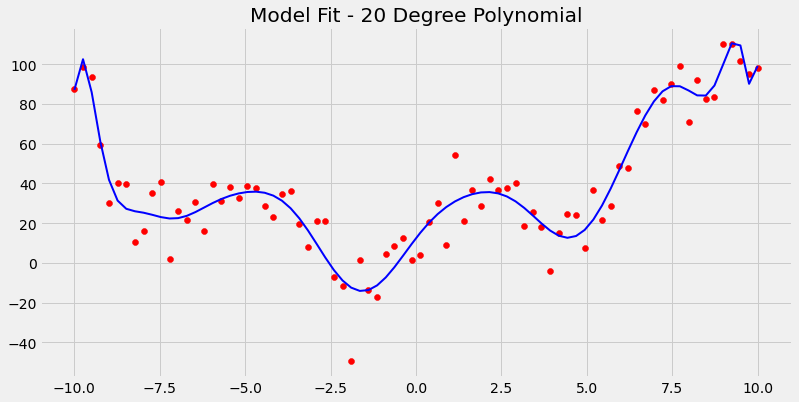

In [232]:
## Answer here and in additional cells if needed
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly20, Y)
coef = lin_reg.coef_
fitted_values = lin_reg.predict(X_poly20)

X_new = np.linspace(-10,10,80).reshape(80,1)


plots.figure(figsize=(12, 6))  
plots.scatter(X,Y,color="red")
plots.plot(X_new, fitted_values, "b-", linewidth=2, label='Model Fit - 20 degree polynomial')
plots.title('Model Fit - 20 Degree Polynomial')

The model appears to do a better job at the ends of the graph (near -10 and 10) and not as well in the middle. Particularly, there are outliers at around -7.4, -2.35, 1.15, and 3.7. 

### Question 3 (5 points)

Fit three LASSO models for three values of the tunning parameter: $\alpha=1$, $\alpha=0.3$ and $\alpha=0.1$. For each of these three models repeat the above: save the coefficients, save the predicted values, and create the plots that show the fit of the model.

Text(0.5, 1.0, 'Model Fit for Lasso (Alpha = 1)')

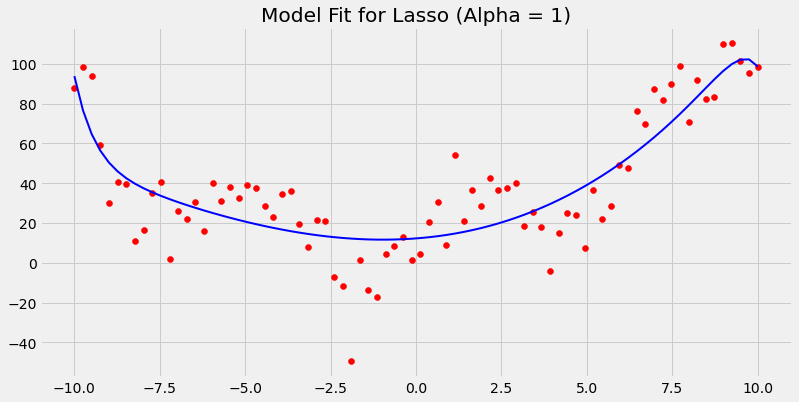

In [233]:
## Answer here and in additional cells if needed
from sklearn.linear_model import Lasso

# Alpha = 1
lasso = Lasso(alpha = 1)
lasso.fit(X_poly20,Y)
lasso1_coef = lasso.coef_
lasso1_fit_val = lasso.predict(X_poly20)

plots.figure(figsize=(12,6))
plots.scatter(X,Y,color='red')
plots.plot(X,lasso1_fit_val,'b-',linewidth=2,label='Model Fit for Lasso (Alpha = 1)')
plots.title('Model Fit for Lasso (Alpha = 1)')

Text(0.5, 1.0, 'Model Fit for Lasso (Alpha = 0.3)')

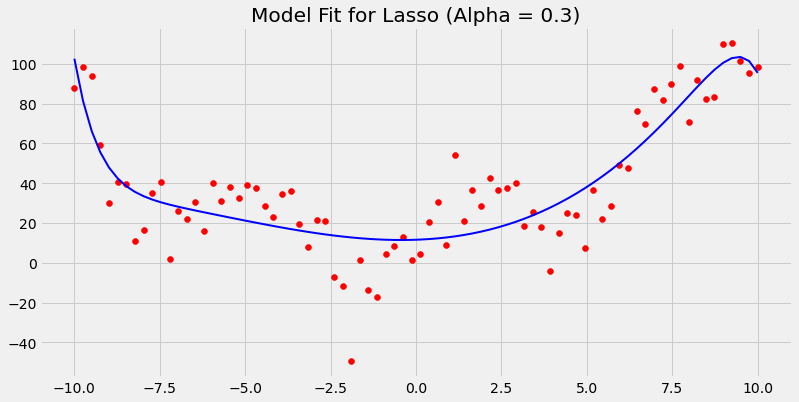

In [234]:
# Alpha = 0.3
lasso = Lasso(alpha = 0.3)
lasso.fit(X_poly20,Y)
lasso03_coef = lasso.coef_
lasso03_fit_val = lasso.predict(X_poly20)

plots.figure(figsize=(12,6))
plots.scatter(X,Y,color='red')
plots.plot(X,lasso03_fit_val,'b-',linewidth=2,label='Model Fit for Lasso (Alpha = 0.3)')
plots.title('Model Fit for Lasso (Alpha = 0.3)')

Text(0.5, 1.0, 'Model Fit for Lasso (Alpha = 0.1)')

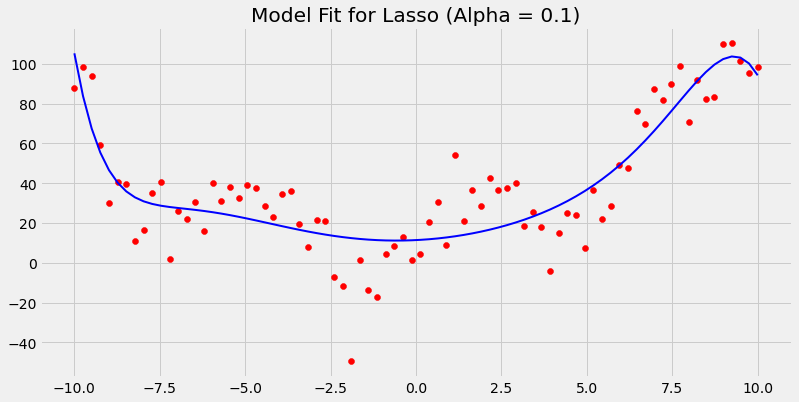

In [235]:
# Alpha = 0.1
lasso = Lasso(alpha = 0.1)
lasso.fit(X_poly20,Y)
lasso01_coef = lasso.coef_
lasso01_fit_val = lasso.predict(X_poly20)

plots.figure(figsize=(12,6))
plots.scatter(X,Y,color='red')
plots.plot(X,lasso01_fit_val,'b-',linewidth=2,label='Model Fit for Lasso (Alpha = 0.1)')
plots.title('Model Fit for Lasso (Alpha = 0.1)')

### Question 4 (5 points)

Fit a Ridge regression model for $\alpha=0.1$. Repeat the above: save the coefficients, save the predicted values, and create the plot that shows the fit of the model.

Text(0.5, 1.0, 'Model Fit for Ridge (Alpha = 0.1)')

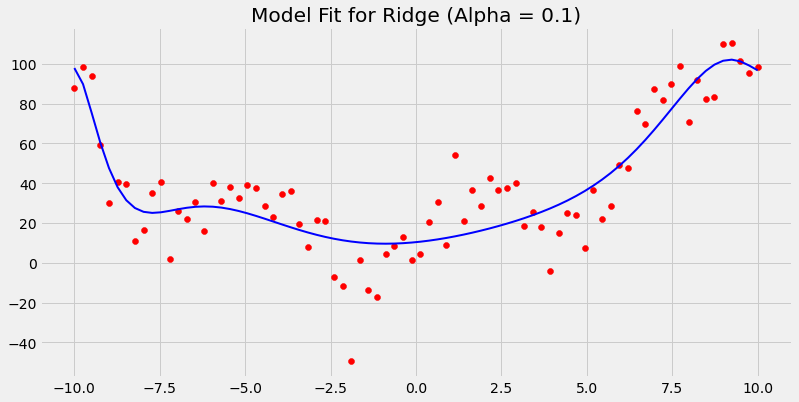

In [236]:
## Answer here and in additional cells if needed
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_poly20,Y)
ridge_coef = ridge.coef_
ridge_fit_vals = ridge.predict(X_poly20)

plots.figure(figsize=(12,6))
plots.scatter(X,Y,color='red')
plots.plot(X,ridge_fit_vals,'b-',linewidth=2,label='Model Fit for Ridge (Alpha = 0.1)')
plots.title('Model Fit for Ridge (Alpha = 0.1)')

### Question 5 (5 points)

Create a new data frame called `X23_df` that contains the above 20 features and three new features: (i) sin(X); (ii) cos(X); (iii) $2^X$. Make sure that the features you save in `X23_df` are standardized.

For this new set of features, fit two models: (a) the multiple linear regression model with all these 23 features; (b) the LASSO model with the default value of $\alpha=1$.

On the same scatterplot, show how these two models fit the data (use different colors for the two curves). Investigated the coefficients you obtain for these two models and comment on your findings.


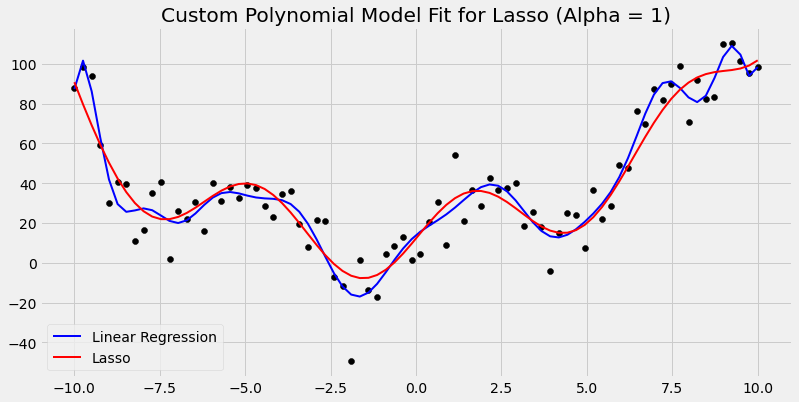

In [237]:
## Answer here and in additional cells if needed
X23_df = pd.DataFrame()
X23_df = X20_df
poly1 = PolynomialFeatures(degree=1, include_bias=False)

#sin(X)
sinx = poly1.fit_transform(np.sin(X))
X23_df['sin(X)'] = scaler.fit_transform(sinx)
#cos(X)
cosx = poly1.fit_transform(np.cos(X))
X23_df['cos(X)'] = scaler.fit_transform(cosx)
#2**X
two_to_X = poly1.fit_transform(2**X)
X23_df['2**X'] = scaler.fit_transform(two_to_X)

X_poly23 = [0 for i in range(80)]

for i in range(80):
    X_poly23[i] = X23_df.loc[i].tolist()

lin_reg.fit(X_poly23, Y)
coef = lin_reg.coef_
fitted_values = lin_reg.predict(X_poly23)

X_new = np.linspace(-10,10,80).reshape(80,1)


plots.figure(figsize=(12, 6))  
plots.scatter(X,Y,color="black")
plots.plot(X_new, fitted_values, "b-", linewidth=2, label='Linear Regression')
plots.title('Model Fit - Custom Polynomial')

#Lasso Time:
lasso = Lasso(alpha = 1)
lasso.fit(X_poly23,Y)
lasso_coef = lasso.coef_
lasso_fit_val = lasso.predict(X_poly23)

plots.plot(X,lasso_fit_val,linewidth=2, label='Lasso', color = 'red')
plots.title('Custom Polynomial Model Fit for Lasso (Alpha = 1)')
plots.legend()

In [238]:
#Coefficients:
print('Linear Regression Coefficients: ', coef)
print('Lasso Coefficients: ', lasso_coef)

Linear Regression Coefficients:  [[-5.03060459e+09 -9.10330276e+09 -2.73731418e+10 -3.39533551e+10
  -5.23448622e+10 -4.79797178e+10 -5.54390540e+10 -4.09904347e+10
  -2.99588197e+10 -1.77106477e+10 -1.52823466e+10 -8.21708348e+09
  -2.57983221e+09 -1.00111437e+09 -1.37992847e+09 -6.08873449e+08
   2.43017188e+07  2.22978729e+07 -5.09173539e+07 -1.81137441e+07
  -2.44094464e+06  2.29344830e+06  2.42862335e+11]]
Lasso Coefficients:  [ 9.77255057 21.57301529  0.          0.         -0.          0.
 -0.          0.         -0.          1.27988396 -0.          1.64095843
 -0.          0.         -0.          0.         -0.          0.
 -0.15955591  0.         13.20544493 -0.          0.        ]


The coefficients for the Lasso fit tend closer to 0 even though it is smoother and does not try to hit all of the points in the graph. 

## 2. Age prediction (25 points)

For this problem, we will use the abalone age prediction dataset obtained from here:

https://archive.ics.uci.edu/ml/datasets/abalone

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope - a time-consuming task. Other measurements, which could be easier to obtain, could be used to predict the age. The columns of the data are:

- Sex: M, F, and I (infant)
- Length (in mm):  longest shell measurement
- Diameter (in mm): perpendicular to length
- Height (in  mm) with meat in shell
- Whole weight (in grams): whole abalone
- Shucked weight (in grams): weight of meat
- Viscera weight (in grams): gut weight (after bleeding)
- Shell weight (in grams): after being dried
- Rings (an integer): used to approximate age (+1.5 gives the age in years)

The variable of interest is `Rings` (our proxy for age) and the rest of the variables will be used to build a model that predicts the number of rings.

In [239]:
# this commands loads the data into a data frame
# run this
ab_df=pd.read_csv("abalone.csv")

print(ab_df.shape)
ab_df.head(10)

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


### Question 1 (one-hot encoding, 3 points)

Create dummy variables that summarize the information in `Sex` and add them to the data frame.


In [240]:
## Answer here and in additional cells if needed
sex_dummy = [0 for i in range(ab_df.shape[0])]
for i in range(ab_df.shape[0]):
    if ab_df.Sex[i] == 'M':
        sex_dummy[i] = 1
    elif ab_df.Sex[i] == 'I':
        sex_dummy[i] = 2
    else:
        sex_dummy[i] = 0
ab_df['Sex Dummy'] = sex_dummy
ab_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex Dummy
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2


### Question 2 (2 points)

Create two data frames that format the data for easy use in regression functions: (i) `Y` that has the column of interest `Rings`; (ii) `X` that has all the numerical features (those provided and the dummy variables you created).

In [241]:
## Answer here and in additional cells if needed
Y = pd.DataFrame()
X = ab_df.drop(['Sex'],axis=1)
Y['Rings'] = ab_df['Rings']

### Question 3 (5 points)

Split the data into training and testing datasets: 

- the training data has 3377 observations (the data for 3377 abalones)
- the testing data has 800 observations
- the testing data is the complement of the training data (no overlap)
- the observations are assigned randomly to the training data (all abalones are equally likely to make it into the training data).

The results of this should be four data frames: `Ytrain` and `Xtrain` (for the training data) and `Ytest` and `Xtest` (for the testing data).


In [242]:
## Answer here and in additional cells if needed
import warnings
warnings.filterwarnings('ignore')
from random import sample
Ytest = Y.sample(800, replace = False)
Ytrain = Y.drop(Ytest.index)
Xtest = X.sample(800, replace = False)
Xtrain = X.drop(Xtest.index)

### Question 4 (15 points)

The goal of this question is to find a LASSO model that predicts well. For this, we need to find the value of $\alpha$ that gives us the best prediction. Start by determining a set of $\alpha$ values you would like to investigate. The minimum size of the set is 5 (test at least 5 values of $\alpha$).

For each $\alpha$ in your set do the following:
- fit the LASSO model (with that value of $\alpha$) on the training data `Ytrain` and `Xtrain`;
- predict the value of Y using this model fit on the `Xtest` data (find the predictions in the testing data);
- for each abalone in the testing data find the prediction error calculated as the absolute value of the difference between the observed number of rings and the prediction you get from the LASSO fit;
- calculate the average prediction error in the testing data.

Report the value of $\alpha$ that gives the best prediction error, and report the coefficients you obtain for that value of $\alpha$. Which variables are left in your best model?

In [250]:
## Answer here and in additional cells if needed
alpha_vals = [0.2,0.4,0.6,0.8,1]
print('Prediction Errors:')
#Lasso Time:
lasso = Lasso(alpha_vals[0])
lasso.fit(Xtrain,Ytrain)
alpha0_predict = lasso.predict(Xtest)
#prediction Error:
abs_dif_0 = np.absolute(Xtest['Rings'] - alpha0_predict)
avg_dif_0 = np.average(abs_dif_0)
print('Alpha 0.2: ', avg_dif_0)
lasso_coef = lasso.coef_
print('Coefficients: ', lasso_coef)

#Lasso Time:
lasso = Lasso(alpha_vals[1])
lasso.fit(Xtrain,Ytrain)
alpha0_predict = lasso.predict(Xtest)
#prediction Error:
abs_dif_0 = np.absolute(Xtest['Rings'] - alpha0_predict)
avg_dif_0 = np.average(abs_dif_0)
print('Alpha 0.4: ', avg_dif_0)

#Lasso Time:
lasso = Lasso(alpha_vals[2])
lasso.fit(Xtrain,Ytrain)
alpha0_predict = lasso.predict(Xtest)
#prediction Error:
abs_dif_0 = np.absolute(Xtest['Rings'] - alpha0_predict)
avg_dif_0 = np.average(abs_dif_0)
print('Alpha 0.6: ', avg_dif_0)

#Lasso Time:
lasso = Lasso(alpha_vals[3])
lasso.fit(Xtrain,Ytrain)
alpha0_predict = lasso.predict(Xtest)
#prediction Error:
abs_dif_0 = np.absolute(Xtest['Rings'] - alpha0_predict)
avg_dif_0 = np.average(abs_dif_0)
print('Alpha 0.8: ', avg_dif_0)

#Lasso Time:
lasso = Lasso(alpha_vals[4])
lasso.fit(Xtrain,Ytrain)
alpha0_predict = lasso.predict(Xtest)
#prediction Error:
abs_dif_0 = np.absolute(Xtest['Rings'] - alpha0_predict)
avg_dif_0 = np.average(abs_dif_0)
print('Alpha 1.0: ', avg_dif_0)


Prediction Errors:
Alpha 0.2:  1.690148079413175
Coefficients:  [-0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.31177995 -0.        ]
Alpha 0.4:  1.7384751610045606
Alpha 0.6:  1.7868022425959464
Alpha 0.8:  1.8351293241873317
Alpha 1.0:  1.8834564057787175


*Answer here:*
I tested alpha values of 0.2, 0.4, 0.6, 0.8, and 1. The one with the least average prediction error is actually for alpha value 0.2. There is a trend in the data that suggests that the lower the alpha value is, the lower the prediction error. The coefficients are also very close to zero in general for Alpha 0.2. 